In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/8_sgd_vs_gd/homeprices_banglore.csv')

In [58]:
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [59]:
df.shape

(20, 3)

In [60]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X.shape

(20, 2)

In [61]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

In [85]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [91]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w -learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list


w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 1000)
w, b, cost

(array([0.66469087, 0.60541671]), -0.17792104056392882, 0.0048654808183488454)

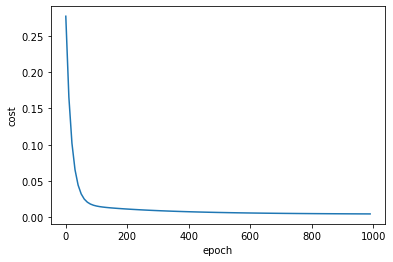

In [65]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [66]:
def predict(area, bedroom, w, b):
    scaled_X = sx.transform([[area, bedroom]])[0]
    scaled_price = w[0]* scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])

predict(1521, 3, w, b)

C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[71.15583406]])

In [67]:
predict(1000, 2, w, b)

C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[34.60197458]])

In [74]:
np.random.randint(len(scaled_X) - 5)

3

In [115]:
# mini batch gradient descent
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate=0.5):
    total_samples = X.shape[0]
    w = np.ones(shape=(X.shape[1]))
    b = 0
    cost_list =[]
    epoch_list = []
    
    for i in range(epochs):
        random_num = np.random.randint(len(X) - 5)
        print('its working')
        y_predicted = np.dot(w, X[random_num: random_num + 5].T) + b
        print('its working..')
        w_grad = -(2/5)*(X[random_num: random_num + 5].T.dot(y_true[random_num: random_num + 5]-y_predicted))
        print('its working..')
        b_grad = -(2/5)*np.sum(y_true[random_num: random_num + 5]-y_predicted)
        print('It\'s working good!')
        
        
        w = w -learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true[random_num: random_num + 5] - y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list
        
        

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 150)

its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working good!
its working
its working..
its working..
It's working goo

In [116]:
w, b, cost

(array([0.79028058, 0.41088082]), -0.10899941872265267, 0.004357674761697936)

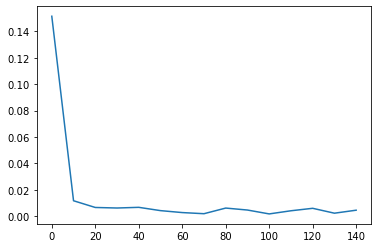

In [117]:
plt.plot(epoch_list, cost_list)